## Compartments and TADs detection

Here, we present the analysis to detect the compartments in Mouse B and iPS cells. In this example, we will use the GC-content (guanine-cytosine content) to identify which bins belong to the A or B compartments. The percentage of bases that are either guanine or cytosine on a DNA strand correlates directly with gene density and is a good measure to identify open and close chromatine.

*__Note__: Compartments are normally detected on the full genome matrix. In our examples we will just detect them on chr3*

TADbit tools uses the `tadbit segment` tool to identify both compartments and TADs.

### Compartments

The identification of compartments is conducted in the normalized matrix at a resolution of around 100kb.  
We will compute the normalization biases for the target resolution 100kb and identify the compartments.

#### Mouse PSC cells

In [1]:
%%bash

tadbit normalize -w ../results/PSC_rep1/ --normalization Vanilla \
    --resolution 100000 --min_count 100

  - Parsing BAM (100 chunks)                                                   [2022-11-15 22:24:57]
      -> cis interactions are defined as being bellow 1 Mb
      -> trans interactions are defined as being bellow 5 Mb
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Collecting cis and total interactions per bin (100 chunks)                 [2022-11-15 22:25:02]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........
  - Removing columns with too few or too much interactions                     [2022-11-15 22:25:03]
      -> too few interactions defined as less than       100 interactions
      -> removed 31 columns (31/31 null/high counts) of 1598 (1.9%)
  - Rescaling sum of interactions per bins                                     [2022-11-15 22:25:04]
  - Vanilla normalization                                   

For the identification of the compartments we will use the TADbit `segment tool` with the `only_compartments` flag. The fasta file of the mus musculus reference genome will be used to determine whether the divisions of the principal component correspond to an A or B compartment. TADbit uses the fasta file to compute the GC ratio and associate the regions with higher ratios to A compartments. 

In [2]:
%%bash

tadbit segment -w ../results/PSC_rep1/ --only_compartments \
    --resolution 100000 -C 12 \
    --fasta ../refGenome/mm39_chr3.fa \
    --chromosomes chr3

loading ../results/PSC_rep1/03_filtered_reads/intersection_f69652928b.bam 
    at resolution 100kb

  (Matrix size 1598x1598)                                                      [2022-11-15 22:32:27]

  - Parsing BAM (100 chunks)                                                   [2022-11-15 22:32:27]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Getting matrices                                                           [2022-11-15 22:32:33]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

Searching compartments
  - Computing GC content to label compartments
Loading cached genome
Processing chromosome chr3
  - Spearman correlation between "rich in A" and Eigenvector:
      rho: 0.7752058 p-val:0.0000000
,-------.
| PATHs |
,----.-------.----------------------------------------------------------

Results are stored in the `06_segmentation/compartments_100kb` subfolder. They include a text file in Tab-separated Values (tsv) format with the description of the compartments and the image of the  correlation matrix used for the identification of the borders for each processed chromosome.

In [3]:
%%bash

ls ../results/PSC_rep1/06_segmentation/compartments_100kb/

chr3_d7d3e585c9.tsv
chr3_EigVect1_d7d3e585c9.tsv
chr3_EV1_d7d3e585c9.png


In [5]:
%%bash

cat ../results/PSC_rep1/06_segmentation/compartments_100kb/chr3_d7d3e585c9.tsv

#	start	end	rich in A	type
chr3	31	87	0.39	B
chr3	88	94	0.52	A
chr3	95	95	nan	B
chr3	96	99	0.61	A
chr3	100	103	0.57	B
chr3	104	105	0.86	A
chr3	106	150	0.39	B
chr3	151	151	nan	A
chr3	152	192	0.40	B
chr3	193	194	0.83	A
chr3	195	219	0.41	B
chr3	220	222	0.63	A
chr3	223	271	0.39	B
chr3	272	289	0.46	A
chr3	290	303	0.43	B
chr3	304	312	0.48	A
chr3	313	313	nan	B
chr3	314	314	nan	A
chr3	315	323	0.47	B
chr3	324	331	0.50	A
chr3	332	339	0.46	B
chr3	340	350	0.48	A
chr3	351	351	nan	B
chr3	352	356	0.53	A
chr3	357	357	nan	B
chr3	358	361	0.54	A
chr3	362	365	0.56	B
chr3	366	367	0.86	A
chr3	368	373	0.49	B
chr3	374	379	0.51	A
chr3	380	385	0.51	B
chr3	386	386	nan	A
chr3	387	405	0.43	B
chr3	406	408	0.62	A
chr3	409	409	nan	B
chr3	410	411	0.85	A
chr3	412	413	0.88	B
chr3	414	416	0.66	A
chr3	417	509	0.38	B
chr3	510	510	nan	A
chr3	511	511	nan	B
chr3	512	527	0.48	A
chr3	528	528	nan	B
chr3	529	532	0.57	A
chr3	533	533	nan	B
chr3	534	536	0.66	A
chr3	537	544	0.47	B
chr3	545	547	0.64	A
chr3	548	548	nan	B
chr3	549	551	0

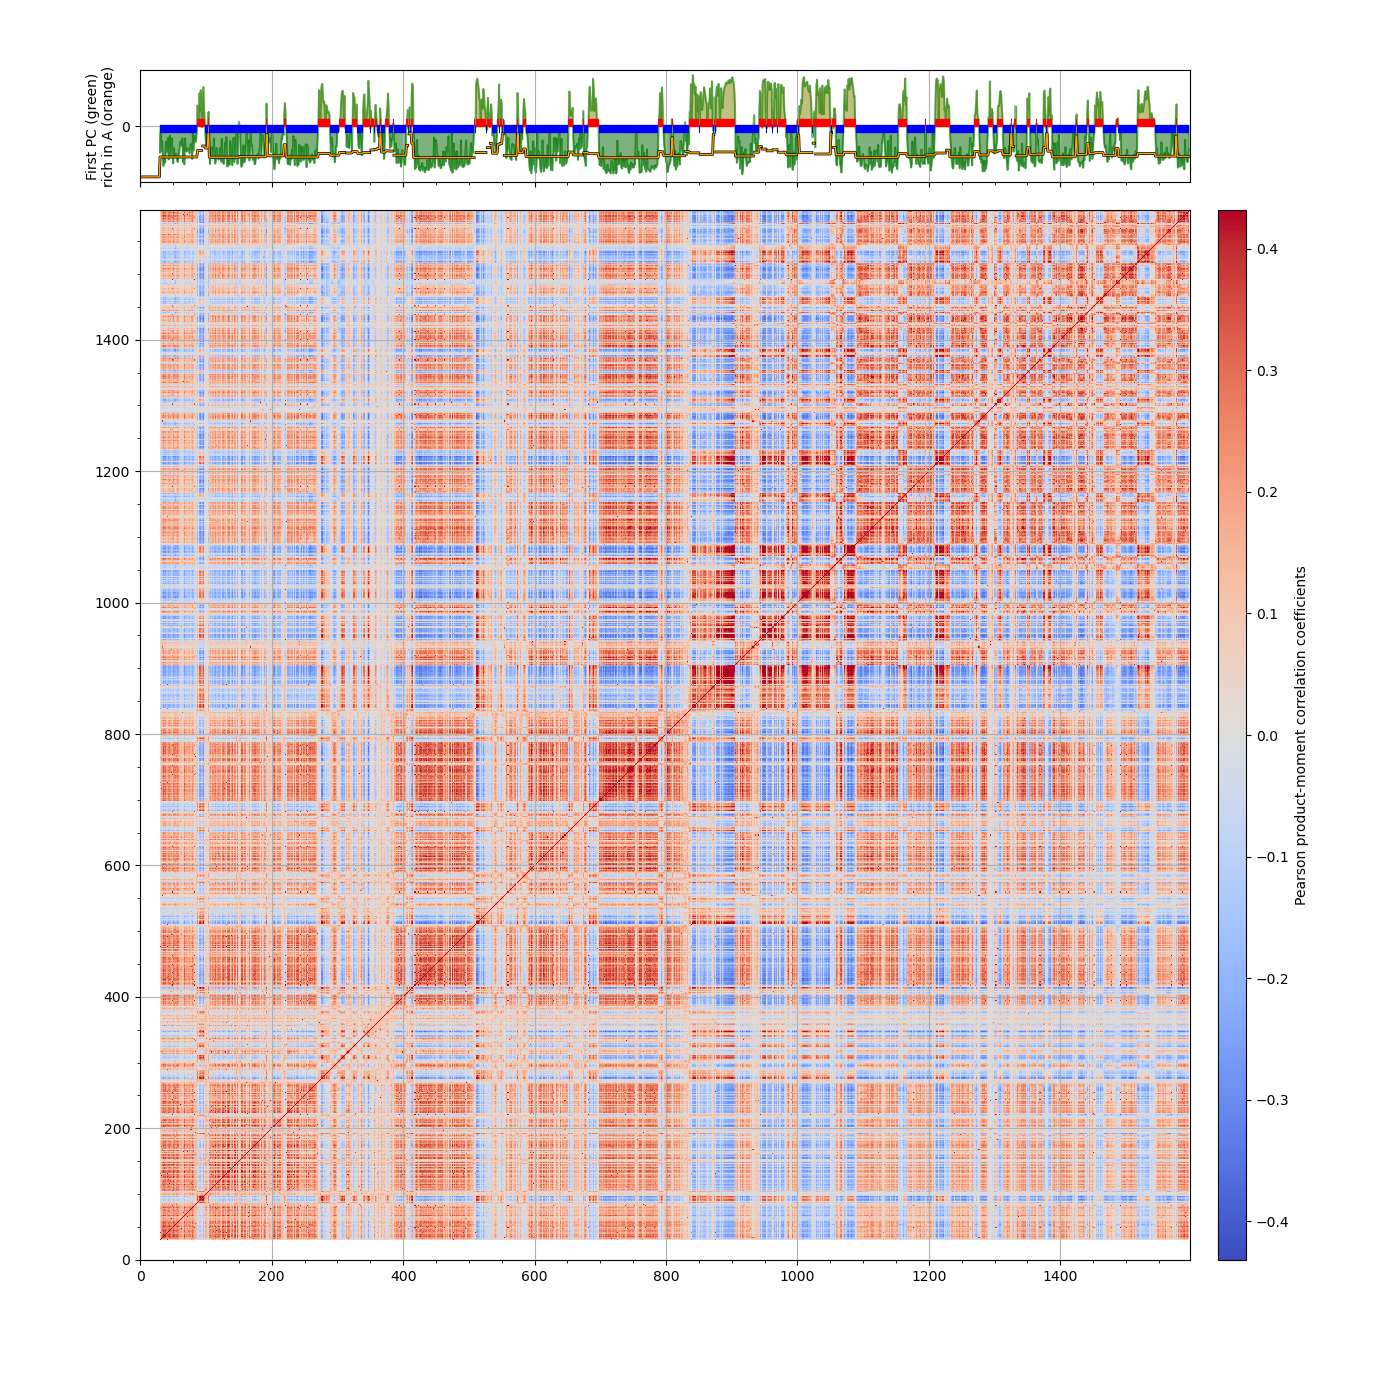

In [6]:
from IPython.display import Image
Image(filename='../results/PSC_rep1/06_segmentation/compartments_100kb/chr3_EV1_d7d3e585c9.png')

#### Mouse B cells

In [7]:
%%bash

tadbit normalize -w ../results/B_rep1/ --normalization Vanilla \
    --resolution 100000 --min_count 100

  - Parsing BAM (100 chunks)                                                   [2022-11-15 22:35:55]
      -> cis interactions are defined as being bellow 1 Mb
      -> trans interactions are defined as being bellow 5 Mb
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Collecting cis and total interactions per bin (100 chunks)                 [2022-11-15 22:35:59]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........
  - Removing columns with too few or too much interactions                     [2022-11-15 22:36:00]
      -> too few interactions defined as less than       100 interactions
      -> removed 31 columns (31/31 null/high counts) of 1598 (1.9%)
  - Rescaling sum of interactions per bins                                     [2022-11-15 22:36:00]
  - Vanilla normalization                                   

In [8]:
%%bash

tadbit segment -w ../results/B_rep1/ --only_compartments \
    --resolution 100000 -C 12 \
    --fasta ../refGenome/mm39_chr3.fa \
    --chromosomes chr3

loading ../results/B_rep1/03_filtered_reads/intersection_f69652928b.bam 
    at resolution 100kb

  (Matrix size 1598x1598)                                                      [2022-11-15 22:36:22]

  - Parsing BAM (100 chunks)                                                   [2022-11-15 22:36:22]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Getting matrices                                                           [2022-11-15 22:36:27]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

Searching compartments
  - Computing GC content to label compartments
Loading cached genome
Processing chromosome chr3
  - Spearman correlation between "rich in A" and Eigenvector:
      rho: 0.6700933 p-val:0.0000000
,-------.
| PATHs |
,----.-------.------------------------------------------------------------

In [9]:
%%bash

ls ../results/B_rep1/06_segmentation/compartments_100kb/

chr3_d7d3e585c9.tsv
chr3_EigVect1_d7d3e585c9.tsv
chr3_EV1_d7d3e585c9.png


In [10]:
%%bash

cat ../results/B_rep1/06_segmentation/compartments_100kb/chr3_d7d3e585c9.tsv

#	start	end	rich in A	type
chr3	31	89	0.39	B
chr3	90	105	0.47	A
chr3	106	146	0.39	B
chr3	147	148	0.80	A
chr3	149	149	nan	B
chr3	150	153	0.52	A
chr3	154	192	0.40	B
chr3	193	194	0.83	A
chr3	195	200	0.49	B
chr3	201	202	0.80	A
chr3	203	218	0.42	B
chr3	219	223	0.52	A
chr3	224	271	0.39	B
chr3	272	278	0.52	A
chr3	279	306	0.43	B
chr3	307	307	nan	A
chr3	308	308	nan	B
chr3	309	312	0.57	A
chr3	313	324	0.46	B
chr3	325	328	0.59	A
chr3	329	357	0.44	B
chr3	358	361	0.54	A
chr3	362	365	0.56	B
chr3	366	367	0.86	A
chr3	368	368	nan	B
chr3	369	371	0.59	A
chr3	372	372	nan	B
chr3	373	383	0.47	A
chr3	384	385	0.85	B
chr3	386	386	nan	A
chr3	387	406	0.43	B
chr3	407	411	0.52	A
chr3	412	413	0.88	B
chr3	414	417	0.57	A
chr3	418	511	0.38	B
chr3	512	543	0.45	A
chr3	544	544	nan	B
chr3	545	547	0.64	A
chr3	548	575	0.42	B
chr3	576	577	0.81	A
chr3	578	583	0.49	B
chr3	584	587	0.55	A
chr3	588	589	0.84	B
chr3	590	593	0.56	A
chr3	594	599	0.46	B
chr3	600	607	0.43	A
chr3	608	612	0.49	B
chr3	613	613	nan	A
chr3	614	638	0.41	B
chr3

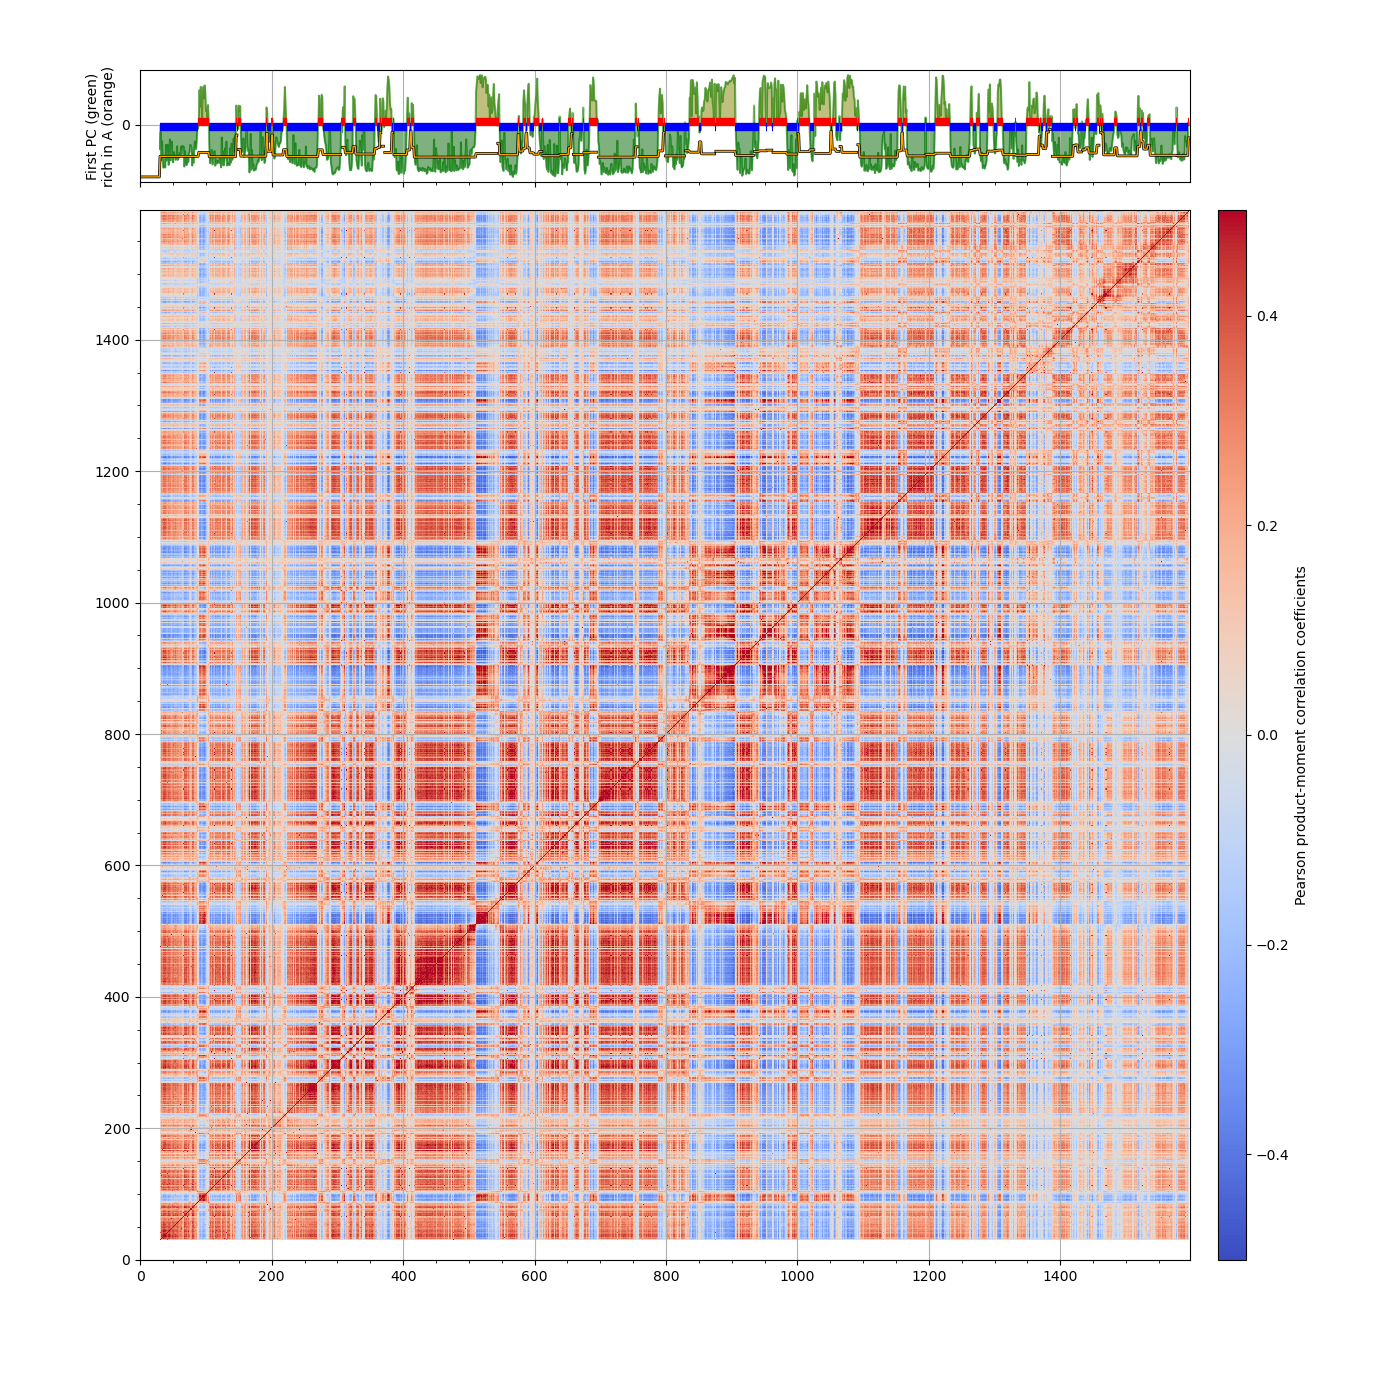

In [12]:
from IPython.display import Image
Image(filename='../results/B_rep1/06_segmentation/compartments_100kb/chr3_EV1_d7d3e585c9.png')

### Compare

As part of the results we also have a file with the coordinates of each computed eigenvector:

In the first column, the coordinates correspond to the assignment of the A and B compartments, positive values for A compartments and negative values for B compartments.

In [13]:
%%bash

head ../results/PSC_rep1/06_segmentation/compartments_100kb/chr3_EigVect1_d7d3e585c9.tsv -n 50

# EV_1 (244.6280)	EV_2 (55.1169)	EV_3 (53.5298)
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
-0.022964638495819447	0.026875404958162246	0.009833734093110119
-0.0055193016341821294	0.009513696472940916	0.0034595558400709785
-0.021781417404761912	0.023547241891823705	0.009410857283036058
-0.012905957486098537	0.016991831646489996	-0.004570122341699796
-0.02331627846464566	0.028372058688217915	-0.001425806493486615
-0.034474730157514843	0.028663732676182486	0.011916958982523054
-0.03246970724017038	0.02762812200866489	0.02044568634095201
-0.027970876672117784	0.03580368850327395	0.021621509634802874
-0.03146182311351932	0.026998705774328804	0.022414271698113324
-0.013580289666757

In [14]:
%%bash

head ../results/B_rep1/06_segmentation/compartments_100kb/chr3_EigVect1_d7d3e585c9.tsv -n 50

# EV_1 (320.1283)	EV_2 (65.7100)	EV_3 (43.6100)
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
nan	nan	nan
-0.0192936813616724	-0.014574721675824675	0.005637777037868356
-0.005898480293301266	0.0005830190641153327	-0.01163820172420244
-0.02802286418659708	0.00931158365127855	-0.02834048047103125
-0.012890991069975958	0.006100572460092985	-0.010067045362966768
-0.025817097335094828	0.00907169303901366	-0.023912775780248308
-0.03376453554112237	0.008918242651828792	-0.033740211231116875
-0.033117852652024146	0.012272820493093585	-0.04483133748783097
-0.03344275781203279	0.010519790133561307	-0.033382974618907955
-0.03367983668403124	0.012761084038695232	-0.03773993423546853
-0.015874457989271

We are going to compare the eigevector values for PSC and B cells with some python code:

In [15]:
from builtins   import next

fh = open('../results/B_rep1/06_segmentation/compartments_100kb/chr3_EigVect1_d7d3e585c9.tsv')

header = next(fh)

ev1_B = []
for line in fh:
    evc1, evc2, evc3 = line.split()
    ev1_B.append(float(evc1))
    
fh = open('../results/PSC_rep1/06_segmentation/compartments_100kb/chr3_EigVect1_d7d3e585c9.tsv')

header = next(fh)

ev1_PSC = []
for line in fh:
    evc1, evc2, evc3 = line.split()
    ev1_PSC.append(float(evc1))
    
diff = []
for i in range(len(ev1_B)):
    diff.append(ev1_B[i] - ev1_PSC[i])

### Spot changes in activity

Plot the difference between each eigenvector along the chromosome 3

In [16]:
from matplotlib import pyplot as plt

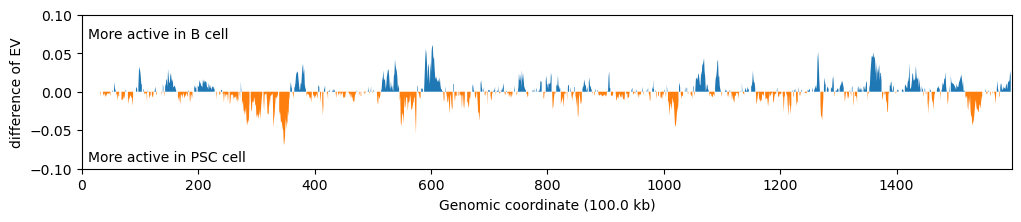

In [17]:
reso = 100000
plt.figure(figsize=(12, 2))
plt.text(10, 0.07, 'More active in B cell')
plt.fill_between(range(len(diff)), diff, 0, where=[i>0 for i in diff])
plt.text(10, -0.09, 'More active in PSC cell')
plt.fill_between(range(len(diff)), diff, 0, where=[i<0 for i in diff])
plt.xlim(0, len(diff))
plt.ylim(-0.1, 0.1)
plt.ylabel('difference of EV')
_ = plt.xlabel('Genomic coordinate (%s kb)' % (reso / 1000))

### Correlate eigenvectors

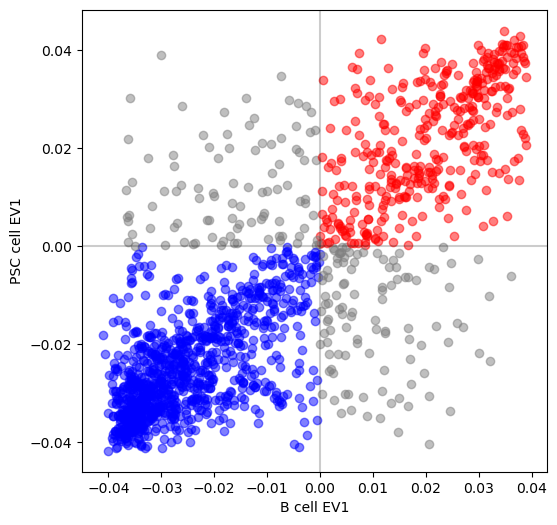

In [18]:
plt.figure(figsize=(6, 6))
for i in range(len(ev1_B)):
    if ev1_B[i] > 0 and ev1_PSC[i] > 0:
        plt.plot(ev1_B[i], ev1_PSC[i], 'ro', alpha=0.5)
    elif ev1_B[i] < 0 and ev1_PSC[i] < 0:
        plt.plot(ev1_B[i], ev1_PSC[i], 'bo', alpha=0.5)
    else:
        plt.plot(ev1_B[i], ev1_PSC[i], 'o', color='grey', alpha=0.5)
plt.axhline(0, color='k', alpha=0.2)
plt.axvline(0, color='k', alpha=0.2)
plt.xlabel('B cell EV1')
_ = plt.ylabel('PSC cell EV1')

### TADs

Now, we move to the TADs detection. In this notebook we will detect TAD borders in chromosome 3 at 50kbp resolution.
We use `tadbit segment`with the `--only_tads` flag. The tool will call internally the detection algorithm named also TADbit. The TADbit algorithm is a breakpoint detection algorithm that returns the optimal segmentation of the chromosome under BIC-penalized likelihood. The model assumes that counts have a Poisson distribution and that the expected value of the counts decreases like a power-law with the linear distance on the chromosome.

#### Mouse B cells

In [19]:
%%bash

tadbit normalize -w ../results/B_rep1/ --normalization Vanilla \
    --resolution 50000 --min_count 100

  - Parsing BAM (100 chunks)                                                   [2022-11-15 22:41:20]
      -> cis interactions are defined as being bellow 1 Mb
      -> trans interactions are defined as being bellow 5 Mb
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Collecting cis and total interactions per bin (100 chunks)                 [2022-11-15 22:41:24]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........
  - Removing columns with too few or too much interactions                     [2022-11-15 22:41:25]
      -> too few interactions defined as less than       100 interactions
      -> removed 64 columns (62/64 null/high counts) of 3195 (2.0%)
  - Rescaling sum of interactions per bins                                     [2022-11-15 22:41:25]
  - Vanilla normalization                                   

In [20]:
%%bash

tadbit segment -w ../results/B_rep1/ --only_tads \
    -r 50000 -C 12 \
    --chromosomes chr3

loading ../results/B_rep1/03_filtered_reads/intersection_f69652928b.bam 
    at resolution 50kb

  (Matrix size 3195x3195)                                                      [2022-11-15 22:41:31]

  - Parsing BAM (100 chunks)                                                   [2022-11-15 22:41:31]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Getting matrices                                                           [2022-11-15 22:41:36]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

Searching TADs
  - chr3
,-------.
| PATHs |
,----.-------.--------------------------------------------------------------------------------.--------------.
| Id | JOBid |                                                                           Path |         Type |
|----+-------+---------------------------------

Results are stored in the `06_segmentation/tads_50kb` subfolder. They include a text file in Tab-separated Values (tsv) format with the description of the TADs for each processed chromosome.

In [21]:
%%bash

ls ../results/B_rep1/06_segmentation/tads_50kb/

chr3_78ca8c83b1.tsv


In [22]:
%%bash

cat ../results/B_rep1/06_segmentation/tads_50kb/chr3_78ca8c83b1.tsv

#	start	end	score	density
1	1	64	6.0	0.007
2	65	70	3.0	0.871
3	71	85	7.0	0.856
4	86	91	4.0	0.993
5	92	97	6.0	0.863
6	98	105	4.0	0.861
7	106	112	6.0	1.151
8	113	147	9.0	0.881
9	148	158	4.0	0.725
10	159	163	4.0	1.005
11	164	171	10.0	0.732
12	172	179	10.0	1.005
13	180	209	10.0	1.493
14	210	278	6.0	0.986
15	279	285	8.0	0.882
16	286	291	8.0	0.598
17	292	298	5.0	0.959
18	299	307	8.0	1.627
19	308	318	7.0	1.172
20	319	326	10.0	0.664
21	327	331	10.0	0.584
22	332	356	4.0	0.923
23	357	361	4.0	0.677
24	362	384	10.0	1.014
25	385	412	10.0	0.988
26	413	438	7.0	0.989
27	439	446	8.0	1.459
28	447	451	10.0	0.56
29	452	537	10.0	1.056
30	538	542	10.0	0.759
31	543	578	10.0	1.124
32	579	583	10.0	0.469
33	584	612	10.0	0.93
34	613	625	8.0	1.288
35	626	630	8.0	0.889
36	631	636	10.0	0.6
37	637	641	5.0	0.832
38	642	647	10.0	0.807
39	648	656	10.0	1.287
40	657	714	10.0	0.931
41	715	723	9.0	1.39
42	724	732	6.0	0.949
43	733	749	8.0	1.253
44	750	766	10.0	1.586
45	767	779	6.0	1.067
46	780	811	10.0	0.95
47	812	835	10.0	

The main output of the tool is a text file with the information of each identified TAD. The file contains: the starting and ending bins in the matrix, a score from 1 to 10 of the statistical robustness or confidence of the boundary and the density. The density is the relative amount of interactions in this TAD. If this relative amount of interactions is higher than 1 the number of interactions inside the TAD is higher than expected according to its size.

We can plot the TADs in the region of chromosome 3 that contains the Sox2 locus (chr3:33950000-35450000) using the `tadbit bin` tool and the `--tad_def` option.

In [29]:
%%bash

tadbit bin -w ../results/B_rep1/ --only_plot \
    -c chr3:35000000-41000000 --resolution 50000  \
    --cmap Reds --format png \
    --norm raw \
    --triangular \
    --tad_def 10


Extraction of chr3:35000000-41000000
Getting raw matrices                                                           [2022-11-15 22:54:08]

  (Matrix size 120x120)                                                        [2022-11-15 22:54:08]

  - Parsing BAM (60 chunks)                                                    [2022-11-15 22:54:08]
     .......... .......... .......... .......... ..........      50/60
     ..........                                                  60/60

  - Getting matrices                                                           [2022-11-15 22:54:09]
     .......... .......... .......... .......... ..........      50/60
     ..........                                                  60/60

 - Plotting: raw                                                               [2022-11-15 22:54:09]
Cleaning                                                                       [2022-11-15 22:54:10]
Saving to DB                                                        

In [30]:
%%bash

ls ../results/B_rep1/05_sub-matrices/

raw_chr3:700-820_50kb_917a355190_tri.png
raw_chr3:700-820_50kb_c3b1dd2168_tri.png
_tmp_sub-matrices_7eb555b08e


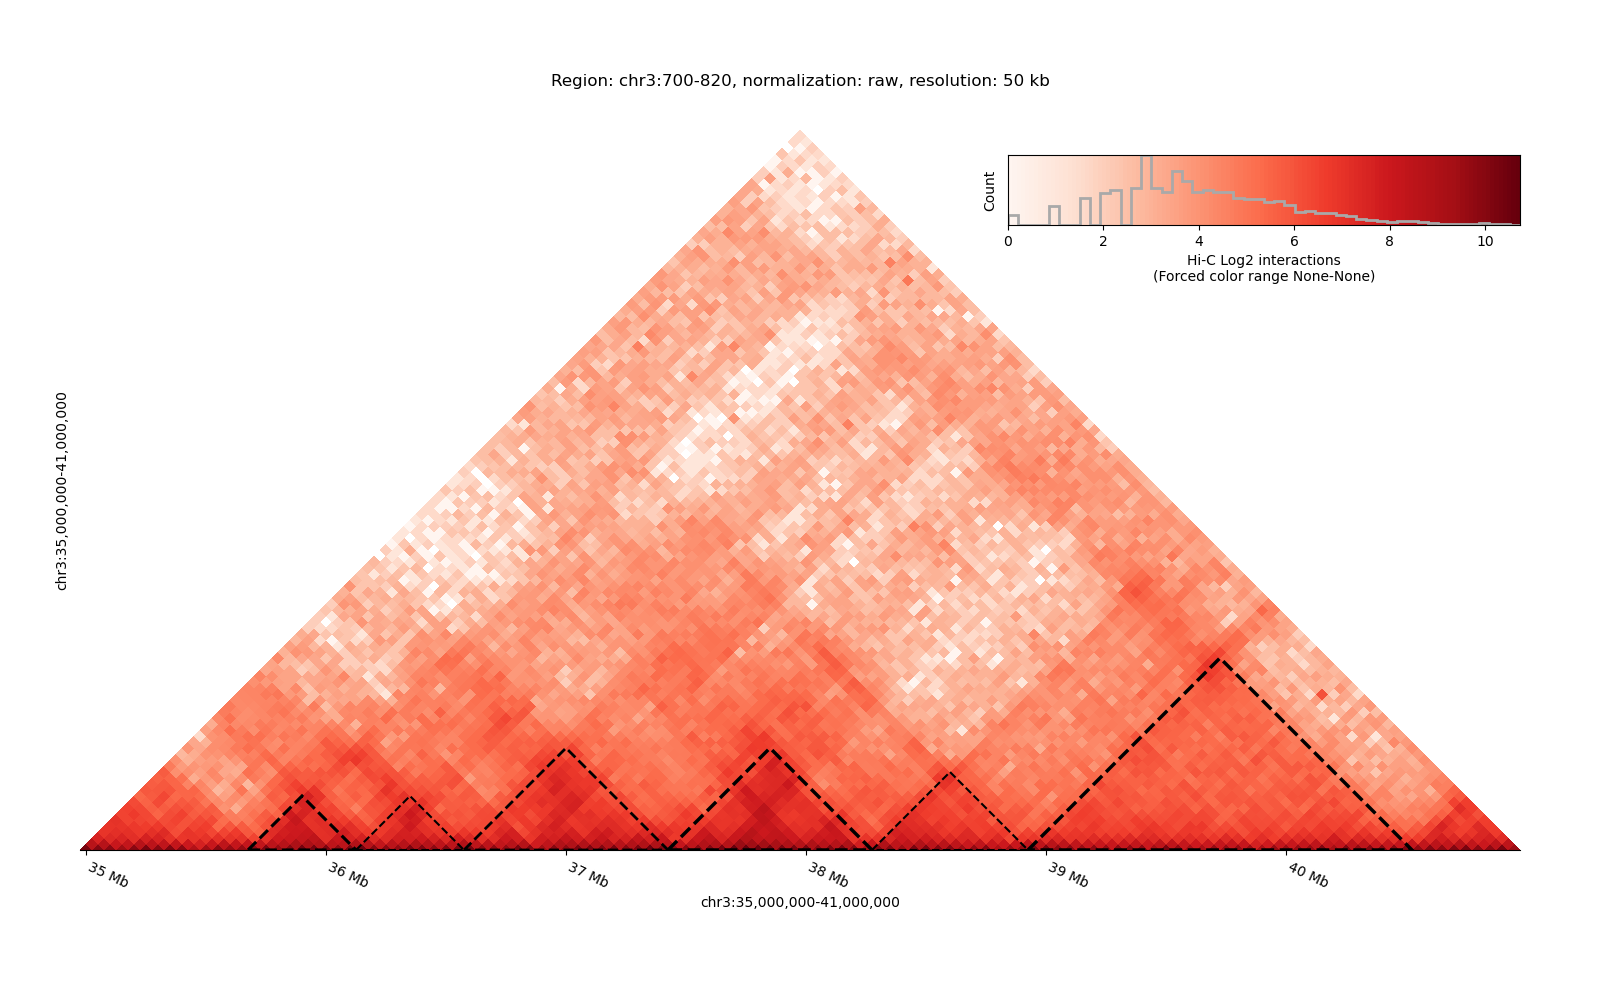

In [31]:
from IPython.display import Image
Image(filename='../results/B_rep1/05_sub-matrices/raw_chr3:700-820_50kb_917a355190_tri.png')

#### Mouse PSC cells

In [32]:
%%bash

tadbit normalize -w ../results/PSC_rep1/ --normalization Vanilla \
    --resolution 50000 --min_count 100

  - Parsing BAM (100 chunks)                                                   [2022-11-15 22:54:42]
      -> cis interactions are defined as being bellow 1 Mb
      -> trans interactions are defined as being bellow 5 Mb
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Collecting cis and total interactions per bin (100 chunks)                 [2022-11-15 22:54:46]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........
  - Removing columns with too few or too much interactions                     [2022-11-15 22:54:47]
      -> too few interactions defined as less than       100 interactions
      -> removed 64 columns (62/64 null/high counts) of 3195 (2.0%)
  - Rescaling sum of interactions per bins                                     [2022-11-15 22:54:48]
  - Vanilla normalization                                   

In [33]:
%%bash

tadbit segment -w ../results/PSC_rep1/ --only_tads \
    -r 50000 -C 12 \
    --chromosomes chr3

loading ../results/PSC_rep1/03_filtered_reads/intersection_f69652928b.bam 
    at resolution 50kb

  (Matrix size 3195x3195)                                                      [2022-11-15 22:54:53]

  - Parsing BAM (100 chunks)                                                   [2022-11-15 22:54:53]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

  - Getting matrices                                                           [2022-11-15 22:55:00]
     .......... .......... .......... .......... ..........     50/100
     .......... .......... .......... .......... ..........    100/100

Searching TADs
  - chr3
,-------.
| PATHs |
,----.-------.--------------------------------------------------------------------------------.--------------.
| Id | JOBid |                                                                           Path |         Type |
|----+-------+-------------------------------

In [35]:
%%bash

ls ../results/PSC_rep1/06_segmentation/tads_50kb/

chr3_78ca8c83b1.tsv


In [36]:
%%bash

tadbit bin -w ../results/PSC_rep1/ --only_plot \
    -c chr3:35000000-41000000 --resolution 50000  \
    --cmap Reds --format png \
    --norm raw \
    --triangular \
    --tad_def 10


Extraction of chr3:35000000-41000000
Getting raw matrices                                                           [2022-11-15 23:02:16]

  (Matrix size 120x120)                                                        [2022-11-15 23:02:16]

  - Parsing BAM (60 chunks)                                                    [2022-11-15 23:02:16]
     .......... .......... .......... .......... ..........      50/60
     ..........                                                  60/60

  - Getting matrices                                                           [2022-11-15 23:02:16]
     .......... .......... .......... .......... ..........      50/60
     ..........                                                  60/60

 - Plotting: raw                                                               [2022-11-15 23:02:17]
Cleaning                                                                       [2022-11-15 23:02:17]
Saving to DB                                                        

In [37]:
%%bash

ls ../results/PSC_rep1/05_sub-matrices/

raw_chr3:700-820_50kb_917a355190_tri.png


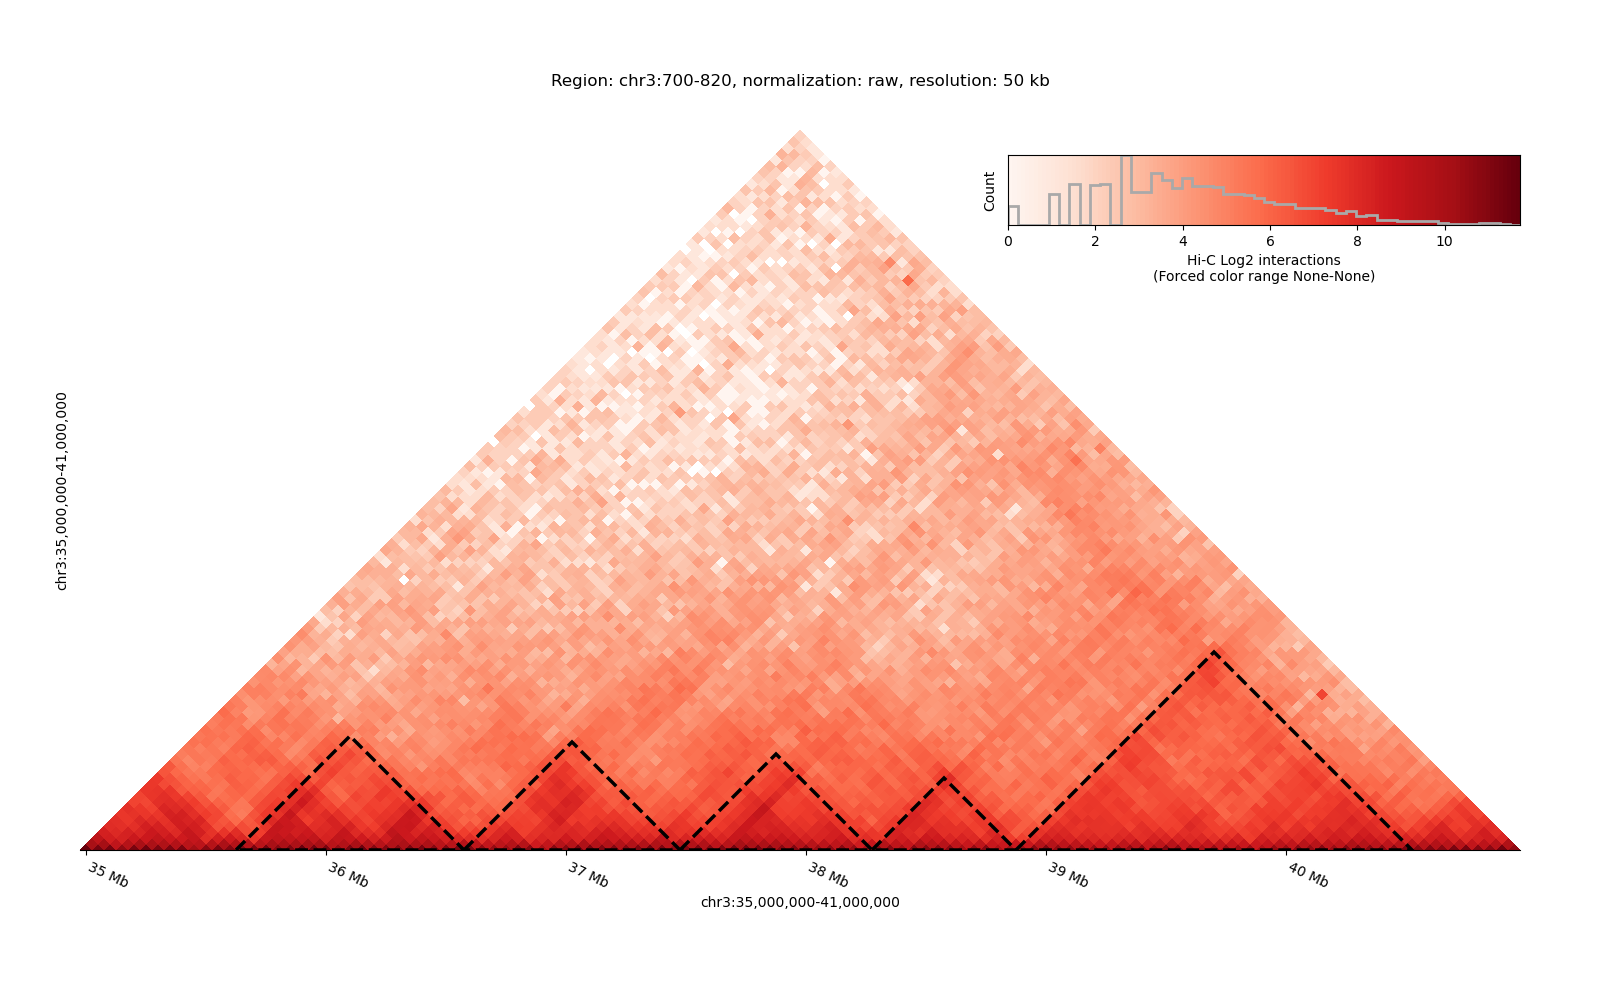

In [39]:
from IPython.display import Image
Image(filename='../results/PSC_rep1/05_sub-matrices/raw_chr3:700-820_50kb_917a355190_tri.png')